# **Problem Statement:K Means Clustering**

Write a Python program that reads the Credit Card Customer Data.csv(provided on  LMS).The  following  are  the  tasks  that  need  to  be consideredwhile constructing  the  solution  to  Segregate  customers  based  on  the  data  provided with the help of k-means clustering.

1.Load the Given CSV file into a DataFrame

2.Find missing values and drop the unnecessary columns

3.Univariate and bivariate analysis

4.Standardize the whole dataset

5.Find the within-cluster sum of square

6.Find the silhouette score

7.Use  a  line  plot  using  matplotlib  to  find  scores  for  different  sizes  of  K  and choose the best size for the cluster and build the final model

8.Observe Cluster behavior with different columns.

9.Print Co-ordinates of all centroids and silhouette scores for the final mode

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0




2.Find missing values and drop the unnecessary columns



In [ ]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


3.Univariate and bivariate analysis



In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df.drop(columns=['Sl_No','Customer Key'],inplace=True)
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


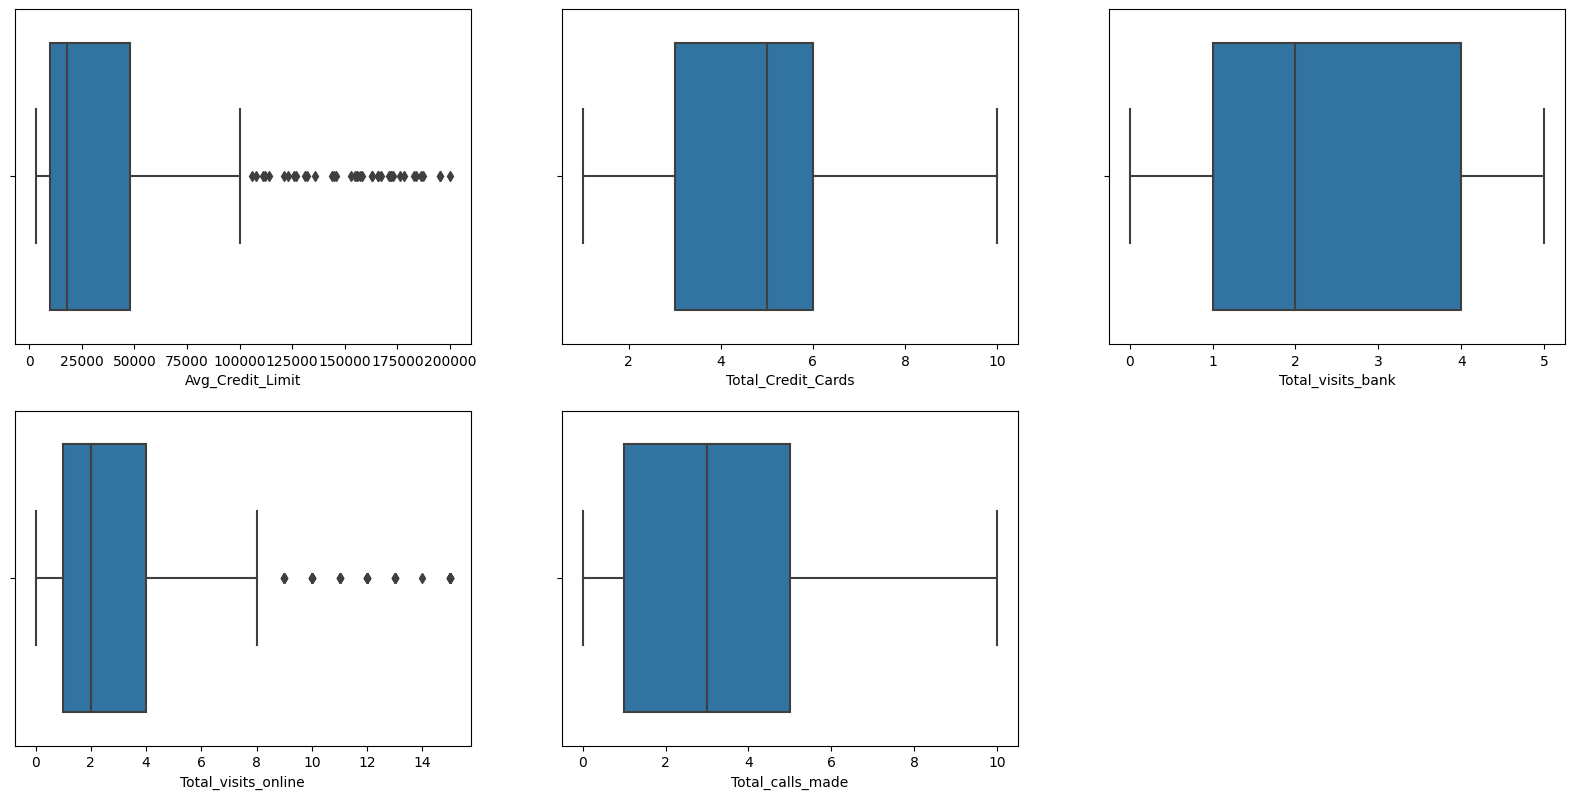

In [ ]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
  plt.subplot(4,3,i)
  sns.boxplot(data=df,x=j)
  i+=1

In [ ]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

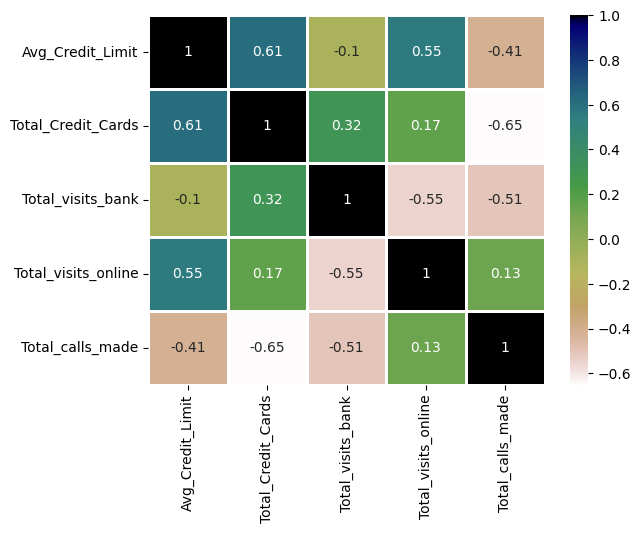

In [ ]:
sns.heatmap(df.corr(),cmap='gist_earth_r',linewidth=1,annot=True)

4.Standardize the whole dataset



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
ss=sc.fit_transform(df)
df3=pd.DataFrame(ss,columns=df.columns)
df3

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


5.Find the within-cluster sum of square



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
wcss=[]
for i in range(1,13):
  km=KMeans(n_clusters=i)
  km.fit(df3)
  wcss.append(km.inertia_)

6.Find the silhouette score



In [ ]:
slf_score=[]
for i in range(2,13):
  km=KMeans(n_clusters=i)
  km.fit(df)
  slf_score.append(silhouette_score(df3,km.labels_))

7.Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model



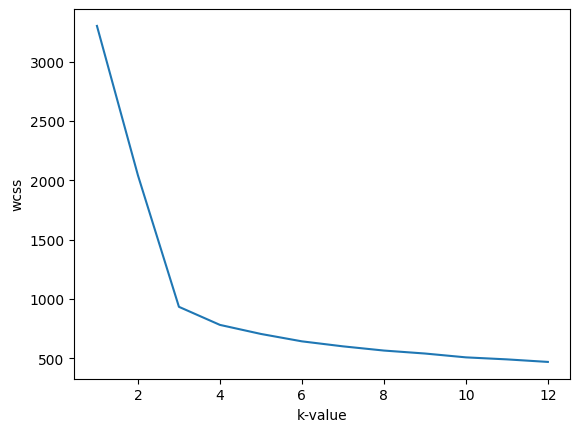

In [ ]:
plt.plot(range(1,13),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.show()

.Observe Cluster behavior with different columns.


In [ ]:
km1=KMeans(n_clusters=3)
km1.fit(df3)
y=km1.predict(df3)
df['label']=y

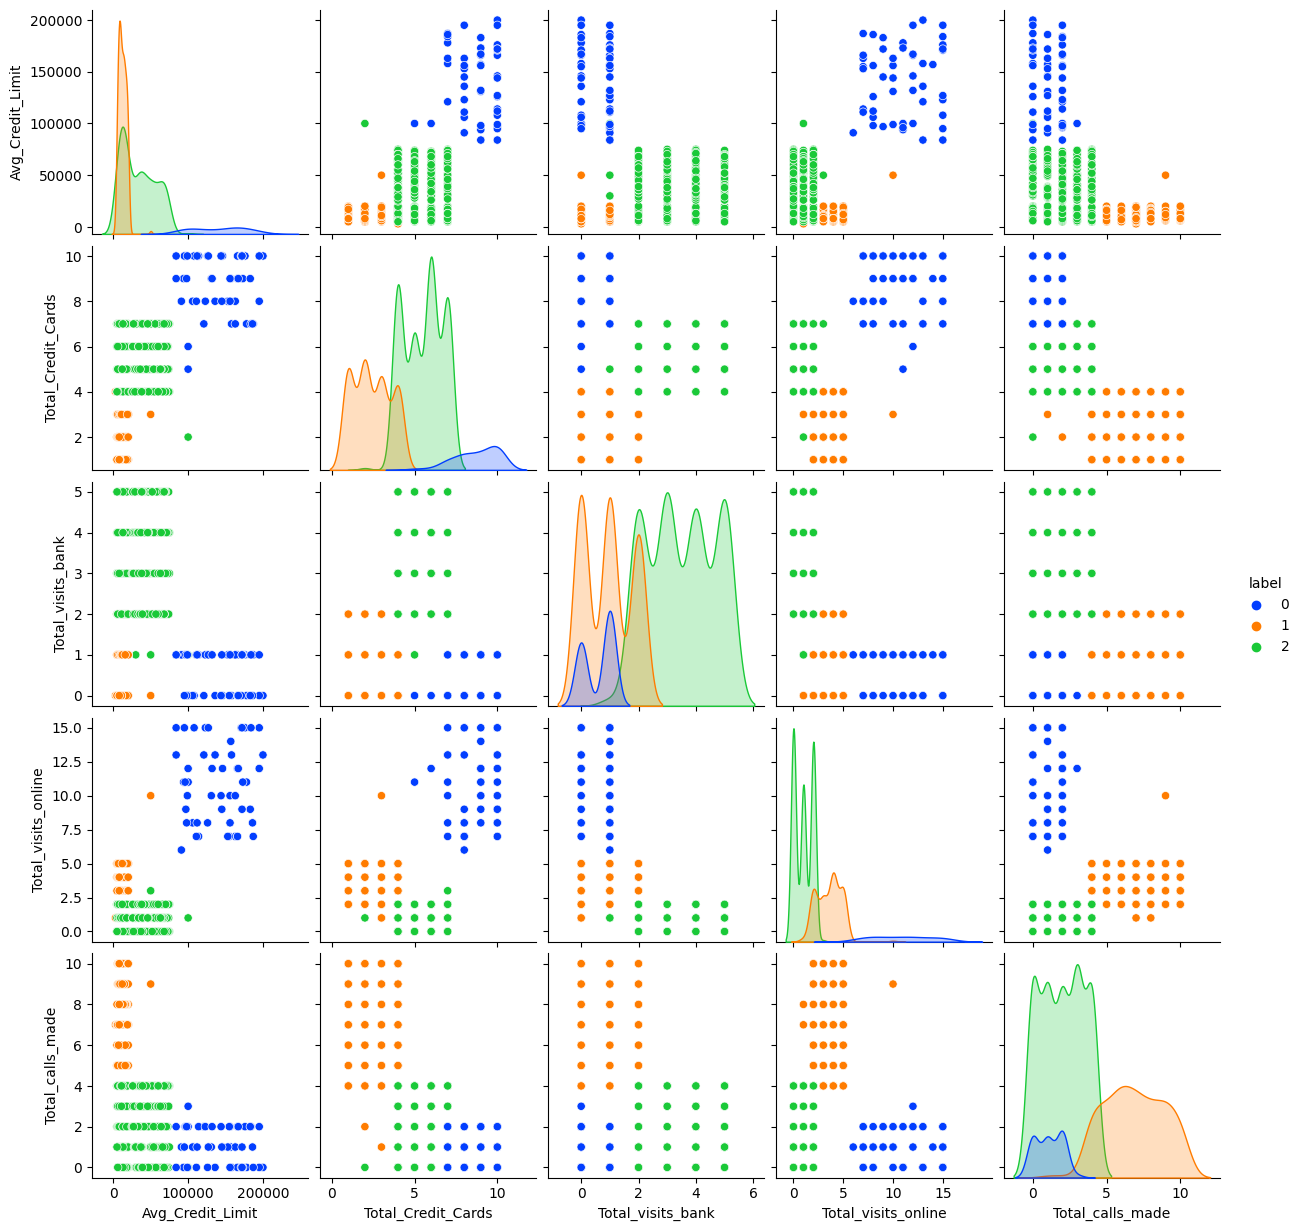

In [ ]:
sns.pairplot(df,hue='label',palette='bright')
plt.show()


9.Print Co-ordinates of all centroids and silhouette scores for the final mode

In [ ]:
sk_centroid=km1.cluster_centers_
sk_centroid

array([[ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488]])

In [ ]:
kmean_sk=silhouette_score(df3,km1.labels_)
kmean_sk

0.5157182558881063